TODO: 
replace weird characters quotation marks
nltk stop words remove them

not sure if need it, but normalization: lowercase, stemming, lemmatization

# Infrastructure

In this section, we are importing necessary libraries, setting up global parameters like folders, and creating the lists of titles, years, etc. 

In [75]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

In [2]:
# this is the folder that should be used: 
txt_adjusted_folder = './data/original/txts_adjusted/'
# only used in pdf extraction
txt_folder = './data/original/txts/'

In [3]:
df = pd.read_csv('./data/original/table_of_contents.csv', header = None, \
                 names = ['original_title', 'page_num','filename','year'])

# skipping first one
filenames =  df['filename'][1:]

# Preparation

Contains code that cleans the data further. As of now: handling weird characters, most importantly quotation marks and apostrophes, which hurt lemmatization. To keep things simple, we are changing everything to ' and ". (Called typewriter apostrophe I think.)

## Example

Checking one writing for examples. 

In [57]:
my_file = open(txt_folder + 'the_dunwich_horror.txt')
raw_text = my_file.read()
characters = raw_text.lower().replace('\n','')
characters = characters.replace('\x0c','')
characters = characters.replace(' ','')

In [70]:
unique_characters = set(characters)
unique_characters_in_string = ''.join(set(characters))
unique_characters_in_string

'-2wdj0i”m8uüosczävèr‖l)q,4b76e’n—a1(:é.ftpk?x‘hg!;93―y5'

We create a string of regular characters, ones that we expect in a text. (Might be expanded later.)

In [81]:
regular_characters = 'abcdefghijklmnopqrstuvwxyz1234567890.,?!()-:;\'"'

In [82]:
for character in regular_characters:
    try:
        unique_characters.remove(character)
    except:
        pass

See what we are left with. 

In [83]:
unique_characters

{'ä', 'è', 'é', 'ü', '—', '―', '‖', '‘', '’', '”'}

In [80]:
'—' == '―'

False

In [84]:
'‘' == '’'

False

In [85]:
'‘' == "'" or  '’' == "'"

False

In [59]:
raw_text.index('ä')

36016

In [86]:
raw_text.index('è')

32285

In [88]:
raw_text.index('é')

66610

In [90]:
raw_text.index('ü')

66781

I checked in the text, the Latin letters look OK. Dashes and apostrophes are annoying. 

## Listing Characters

Let's gather a similar string, just for all the writings combined.

In [94]:
raw_text = ''
for filename in filenames:
    my_file = open(txt_folder + filename + '.txt')
    raw_text += my_file.read()
# this runs surprisingly fast

In [225]:
regular_characters = 'abcdefghijklmnopqrstuvwxyz1234567890°×·/.,?¿!¡()[]-–:;\'"áääæéêëèïñöü#&'
# expanded after considering examples in the text 

In [206]:
characters = raw_text.lower().replace('\n','')
characters = characters.replace('\x0c','')
characters = characters.replace(' ','')

In [207]:
unique_characters = set(characters)
for character in regular_characters:
    try:
        unique_characters.remove(character)
    except:
        pass

In [208]:
unique_characters

{'*', 'å', 'ν', 'ο', 'π', 'ς', 'υ', '—', '―', '‖', '‗', '‘', '’', '”', '•'}

One by one, check examples in the text make the decision whether we 1) delete, 2) leave unchanged, or 3) replace with an other character. Decision is collected in the dictionary at the end. 

In [197]:
position_1 = raw_text.find('*')
raw_text[position_1-20:position_1+20]

'ing to its ashes. \n\n*      *      * \n\nTh'

In [198]:
position_2 = raw_text[position_1 + 20:].find('*')
raw_text[position_1 + 20:][position_2-20:position_2+20]

''

In [226]:
# these letters are assumed OK
"""
 'å',
 'ν',
 'ο',
 'π',
 'ς',
 'υ',
"""

"\n 'å',\n 'ν',\n 'ο',\n 'π',\n 'ς',\n 'υ',\n"

In [195]:
position_1 = raw_text.find('ä')
raw_text[position_1-20:position_1+20]

'man authority, ―es lässt sich nicht lese'

In [196]:
position_2 = raw_text[position_1 + 20:].find('ä')
raw_text[position_1 + 20:][position_2-20:position_2+20]

'ces of the Widmannstätten \nfigures found'

In [200]:
character_to_check = '–'
position_1 = raw_text.find(character_to_check)
raw_text[position_1-20:position_1+20]

' \nthe winter of 1900–1901, when to the s'

In [201]:
position_2 = raw_text[position_1 + 20:].find(character_to_check)
raw_text[position_1 + 20:][position_2-20:position_2+20]

' of September 24, 19––, I heard a knock '

In [212]:
character_to_check = '—'
position_1 = raw_text.find(character_to_check)
raw_text[position_1-20:position_1+20]

'ams of a waning moon—but of these things'

In [213]:
position_2 = raw_text[position_1 + 20:].find(character_to_check)
raw_text[position_1 + 20:][position_2-20:position_2+20]

'Than white as a lily—and dead half a yea'

In [214]:
character_to_check = '―'
position_1 = raw_text.find(character_to_check)
raw_text[position_1-20:position_1+20]

'g to what they call ―divine wrath‖ in a '

In [215]:
position_2 = raw_text[position_1 + 20:].find(character_to_check)
raw_text[position_1 + 20:][position_2-20:position_2+20]

'd bore the initials ―J. H.‖ The face was'

In [216]:
character_to_check = '‖'
position_1 = raw_text.find(character_to_check)
raw_text[position_1-20:position_1+20]

'y call ―divine wrath‖ in a \nmanner that '

In [217]:
position_2 = raw_text[position_1 + 20:].find(character_to_check)
raw_text[position_1 + 20:][position_2-20:position_2+20]

' the initials ―J. H.‖ The face was such '

In [218]:
character_to_check = '‗'
position_1 = raw_text.find(character_to_check)
raw_text[position_1-20:position_1+20]

'ation to reach some ‗big, big \ncabin wit'

In [219]:
position_2 = raw_text[position_1 + 20:].find(character_to_check)
raw_text[position_1 + 20:][position_2-20:position_2+20]

' and kill a certain ‗thing that shines a'

In [223]:
character_to_check = '•'
position_1 = raw_text.find(character_to_check)
raw_text[position_1-20:position_1+20]

'an decadence: \n\nHEL • HELOYM • SOTHER • '

In [224]:
#that looks intentional, leave it

In [241]:
replace_dict = {}
replace_dict['*'] = ''
replace_dict['—'] = '–'
replace_dict['―'] = ''
replace_dict['‖'] = '\"'
replace_dict['‗'] = ''
replace_dict['”'] = '"'
replace_dict['‘'] = '\''
replace_dict['’'] = '\''

## Adjusting the Text Files

Loop through the writings, replace the text, then save in the adjusted txt folder. 

In [248]:
for filename in filenames: 
    # read in original file
    my_file = open(txt_folder + filename + '.txt')
    raw_text = my_file.read()
    # replace characters
    for replace_char in replace_dict: 
        raw_text = raw_text.replace(replace_char, replace_dict[replace_char])
    # save the adjusted text in a different file
    text_file = open(txt_adjusted_folder + filename + '.txt', 'w')
    text_file.write(raw_text)
    text_file.close()

# Word Count

Simply count the words, can use string split for that. 
This will for example combine end-of-sentence punctuations, but that's fine. 

In [8]:
words = raw_text.split()

In [10]:
len(words)

17435

this would not work, leaves in dashes, like 'superstition—but'

In [22]:
words = re.split(r'[-\s.,;—!‖?]+', raw_text)

In [23]:
len(words)

17607

# Tokenize with NLTK

different tokenizations, do page 41 example do do things like word that in every writing

trying regex tokenizer first

In [29]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')
words = tokenizer.tokenize(raw_text)

In [30]:
len(words)

19945

source: http://www.nltk.org/book/ch01.html
https://www.nltk.org/book/ch03.html

In [252]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(raw_text)

In [253]:
len(tokens)

4436

In [34]:
tokens[500:]

['close',
 'to',
 'the',
 'feet',
 'of',
 'the',
 'domed',
 'hills',
 'among',
 'which',
 'it',
 'rises.',
 'As',
 'the',
 'hills',
 'draw',
 'nearer',
 ',',
 'one',
 'heeds',
 'their',
 'wooded',
 'sides',
 'more',
 'than',
 'their',
 'stone-crowned',
 'tops.',
 'Those',
 'sides',
 'loom',
 'up',
 'so',
 'darkly',
 'and',
 'precipitously',
 'that',
 'one',
 'wishes',
 'they',
 'would',
 'keep',
 'their',
 'distance',
 ',',
 'but',
 'there',
 'is',
 'no',
 'road',
 'by',
 'which',
 'to',
 'escape',
 'them.',
 'Across',
 'a',
 'covered',
 'bridge',
 'one',
 'sees',
 'a',
 'small',
 'village',
 'huddled',
 'between',
 'the',
 'stream',
 'and',
 'the',
 'vertical',
 'slope',
 'of',
 'Round',
 'Mountain',
 ',',
 'and',
 'wonders',
 'at',
 'the',
 'cluster',
 'of',
 'rotting',
 'gambrel',
 'roofs',
 'bespeaking',
 'an',
 'earlier',
 'architectural',
 'period',
 'than',
 'that',
 'of',
 'the',
 'neighbouring',
 'region.',
 'It',
 'is',
 'not',
 'reassuring',
 'to',
 'see',
 ',',
 'on',
 'a',

let's see what it does with a sentence like 'I dun‘t keer what folks think—ef Lavinny‘s boy looked like his pa, he wouldn‘t look like nothin‘ ye expeck.'

In [39]:
tokens.index('Lavinny')

2169

In [40]:
tokens[2169:]

['Lavinny',
 '‘',
 's',
 'boy',
 'looked',
 'like',
 'his',
 'pa',
 ',',
 'he',
 'wouldn',
 '‘',
 't',
 'look',
 'like',
 'nothin',
 '‘',
 'ye',
 'expeck.',
 'Ye',
 'needn',
 '‘',
 't',
 'think',
 'the',
 'only',
 'folks',
 'is',
 'the',
 'folks',
 'hereabaouts.',
 'Lavinny',
 '‘',
 's',
 'read',
 'some',
 ',',
 'an',
 '‘',
 'has',
 'seed',
 'some',
 'things',
 'the',
 'most',
 'o',
 '‘',
 'ye',
 'only',
 'tell',
 'abaout.',
 'I',
 'calc',
 '‘',
 'late',
 'her',
 'man',
 'is',
 'as',
 'good',
 'a',
 'husban',
 '‘',
 'as',
 'ye',
 'kin',
 'find',
 'this',
 'side',
 'of',
 'Aylesbury',
 ';',
 'an',
 '‘',
 'ef',
 'ye',
 'knowed',
 'as',
 'much',
 'abaout',
 'the',
 'hills',
 'as',
 'I',
 'dew',
 ',',
 'ye',
 'wouldn',
 '‘',
 't',
 'ast',
 'no',
 'better',
 'church',
 'weddin',
 '‘',
 'nor',
 'her',
 '‘',
 'n.',
 'Let',
 'me',
 'tell',
 'ye',
 'suthin',
 '‘',
 '—some',
 'day',
 'yew',
 'folks',
 '’',
 'll',
 'hear',
 'a',
 'child',
 'o',
 '’',
 'Lavinny',
 '’',
 's',
 'a-callin',
 '’',
 'i

In [41]:
test_sentence = "I don't think we'll go."

In [42]:
tokenizer.tokenize(test_sentence)

['I', 'do', "n't", 'think', 'we', "'ll", 'go', '.']

In [47]:
test_sentence_2 = "Why wouldn't we?"

In [48]:
tokenizer.tokenize(test_sentence_2)

['Why', 'would', "n't", 'we', '?']

In [50]:
test_sentence_3 = "Why wouldn‘t we?"

In [51]:
tokenizer.tokenize(test_sentence_3)

['Why', 'wouldn', '‘', 't', 'we', '?']

In [5]:
from nltk.util import ngrams

In [17]:
two_grams = list(ngrams(tokens,2))

In [21]:
my_dict = {x:two_grams.count(x) for x in two_grams}

In [22]:
sorted_d = sorted(my_dict.items(), key=lambda x: x[1])

In [24]:
sorted_d[-20:]

[(('o', '‘'), 26),
 (('of', 'a'), 29),
 (('It', 'was'), 30),
 ((',', 'the'), 31),
 (('seemed', 'to'), 31),
 ((';', 'and'), 33),
 (('at', 'the'), 38),
 ((',', 'an'), 42),
 (('from', 'the'), 46),
 (('‘', 't'), 46),
 ((',', 'but'), 54),
 (('on', 'the'), 58),
 (('to', 'the'), 59),
 (('and', 'the'), 64),
 (('.', '.'), 78),
 (('an', '‘'), 80),
 (('in', 'the'), 85),
 (('‘', 's'), 135),
 (('of', 'the'), 170),
 ((',', 'and'), 233)]

trying out things from nltk guide, need to convert to nltk text, based on forum here: https://stackoverflow.com/questions/29110950/python-concordance-command-in-nltk

maybe do Porter Stemmer (pg 59) for word analysis

# Other NLTK Stuff

ply with concordance and similar

In [28]:
textList = Text(tokens)
textList.concordance('horror')

Displaying 24 of 24 matches:
The Dunwich Horror ―Gorgons , and Hydras , and Chimaer
ble , and since a certain season of horror all the signboards pointing toward 
 our sensible age—since the Dunwich horror of 1928 was hushed up by those who 
ave the facts concerning the recent horror , can say just what is the matter w
ded only in 1928 , when the Dunwich horror came and went ; yet at no time did 
 was thought very notable until the horror of 1928 suggested the most valid of
some terrible part of the intruding horror , and to glimpse a hellish advance 
tains that May-Night ? What Roodmas horror fastened itself on the world in hal
as Wilbur Whateley. VI. The Dunwich horror itself came between Lammas and the 
 the dark of September 9th that the horror broke loose. The hill noises had be
and Cold Spring Glen , examining in horror the vast , monstrous prints , the m
end and beard the unknown Cyclopean horror in its lair. Three dogs that were w
re were many who hoped that the new horror had 

In [32]:
textList.similar('unseen')

dunwich new recent serene intruding mountainous


# Sentiment Analysis

https://github.com/cjhutto/vaderSentiment

## General Examples

In [5]:
sentiment_analyzer = SentimentIntensityAnalyzer()
token_scores = sentiment_analyzer.lexicon
token_scores['adorned']

0.8

In [9]:
sentiment_analyzer.polarity_scores('I feel good')

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [10]:
sentiment_analyzer.polarity_scores('adorned')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}

In [15]:
0.8 / 0.2023

3.954522985664854

In [11]:
sentiment_analyzer.polarity_scores('I feel nothing inside.')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [12]:
sentiment_analyzer.polarity_scores('The soup tastes bad')

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

## Lovecraft Examples

In [16]:
text_to_analyze = 'Then came we to a pleasant coast gay with blossoms of every hue, where as far inland as we could see basked lovely groves and radiant arbours beneath a meridian sun. '


In [17]:
sentiment_analyzer.polarity_scores(text_to_analyze)

{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.8807}

In [ ]:
# loop through text, list words with values

In [34]:
result = []

for word in text_to_analyze.split():
    if word in token_scores:
        result.append((word, token_scores[word]))
        
result

[('pleasant', 2.3), ('lovely', 2.8), ('radiant', 2.1)]

In [26]:
text_to_analyze_2 = 'I have said that the unbroken monotony of the rolling plain was a source of vague horror to me; but I think my horror was greater when I gained the summit of the mound and looked down the other side into an immeasurable pit or canyon, whose black recesses the moon had not yet soared high enough to illumine. I felt myself on the edge of the world; peering over the rim into a fathomless chaos of eternal night. Through my terror ran curious reminiscences of Paradise Lost, and of Satan‘s hideous climb through the unfashioned realms of darkness.'


In [28]:
sent_score = sentiment_analyzer.polarity_scores(text_to_analyze_2)
sent_score

{'neg': 0.186, 'neu': 0.692, 'pos': 0.121, 'compound': -0.8074}

In [29]:
sent_score['neg']

0.186

In [20]:
result = []

for word in text_to_analyze_2.split():
    if word in token_scores:
        result.append((word, token_scores[word]))
        
result

[('vague', -0.4),
 ('horror', -2.7),
 ('horror', -2.7),
 ('greater', 1.5),
 ('gained', 1.6),
 ('chaos', -2.7),
 ('terror', -2.4),
 ('curious', 1.3)]

## Ranking all the Stories

In [25]:
sentiment_analysis_df = pd.DataFrame()
sentiment_analysis_df['filename'] = filenames

In [38]:
neg_portion = []
neu_portion = []
pos_portion = []
compound_score = []

for filename in filenames:
    print("Processing " + filename)
    my_file = open(txt_adjusted_folder + filename + '.txt')
    raw_text = my_file.read()
    sent_score = sentiment_analyzer.polarity_scores(raw_text)
    neg_portion.append(sent_score['neg'])
    neu_portion.append(sent_score['neu'])
    pos_portion.append(sent_score['pos'])
    compound_score.append(sent_score['compound'])

Processing the_tomb
Processing dagon
Processing polaris
Processing beyond_the_wall_of_sleep
Processing memory
Processing old_bugs
Processing the_transition_of_juan_romero
Processing the_white_ship
Processing the_doom_that_came_to_sarnath
Processing the_statement_of_randolph_carter
Processing the_terrible_old_man
Processing the_tree
Processing the_cats_of_ulthar
Processing the_temple
Processing facts_concerning_the_late_arthur_jermyn_and_his_family
Processing the_street
Processing celephaïs
Processing from_beyond
Processing nyarlathotep
Processing the_picture_in_the_house
Processing ex_oblivione
Processing the_nameless_city
Processing the_quest_of_iranon
Processing the_moon-bog
Processing the_outsider
Processing the_other_gods
Processing the_music_of_erich_zann
Processing herbert_west_—_reanimator
Processing hypnos
Processing what_the_moon_brings
Processing azathoth
Processing the_hound
Processing the_lurking_fear
Processing the_rats_in_the_walls
Processing the_unnamable
Processing the_

In [39]:
sentiment_analysis_df['neg_portion'] = neg_portion
sentiment_analysis_df['neu_portion'] = neu_portion
sentiment_analysis_df['pos_portion'] = pos_portion
sentiment_analysis_df['compound_score'] = compound_score

In [40]:
sentiment_analysis_df

,filename,neg_portion,neu_portion,pos_portion,compound_score
1,the_tomb,0.117,0.799,0.084,-0.9995
2,dagon,0.095,0.836,0.069,-0.9968
3,polaris,0.130,0.767,0.103,-0.9889
4,beyond_the_wall_of_sleep,0.108,0.781,0.111,0.8094
5,memory,0.049,0.905,0.045,0.3612
...,...,...,...,...,...
59,the_thing_on_the_doorstep,0.109,0.811,0.080,-0.9999
60,the_evil_clergyman,0.080,0.831,0.089,0.9637
61,the_book,0.088,0.838,0.075,-0.8896
62,the_shadow_out_of_time,0.100,0.800,0.099,-0.9944


In [41]:
sentiment_analysis_df.to_csv('./results/sentiment_analysis.csv')

In [94]:
sentiment_analysis_df = pd.read_csv('./results/sentiment_analysis.csv')

In [95]:
sentiment_analysis_df.describe()

,Unnamed: 0,neg_portion,neu_portion,pos_portion,compound_score
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32.000000,0.107730,0.809111,0.083190,-0.502546
std,18.330303,0.026684,0.031800,0.021803,0.840161
min,1.000000,0.048000,0.714000,0.030000,-1.000000
25%,16.500000,0.092500,0.788500,0.069500,-0.999700
50%,32.000000,0.108000,0.808000,0.084000,-0.998200
75%,47.500000,0.122500,0.827000,0.095000,-0.221300
max,63.000000,0.164000,0.905000,0.164000,0.999600


In [96]:
sentiment_analysis_df.sort_values('compound_score', inplace = True)
titles = sentiment_analysis_df['filename']
compound_score = sentiment_analysis_df['compound_score']
neg_portion = sentiment_analysis_df['neg_portion']
neu_portion = sentiment_analysis_df['neu_portion']
pos_portion = sentiment_analysis_df['pos_portion']


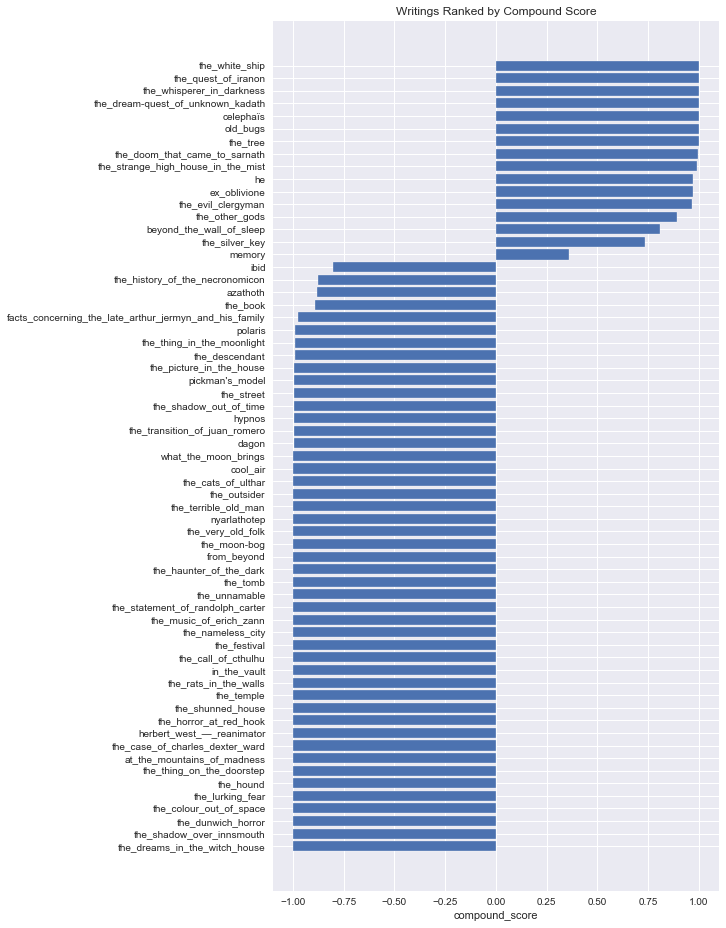

In [97]:
plt.figure(figsize = (8,16))
plt.barh(width = compound_score, y = titles)
plt.title('Writings Ranked by Compound Score')
plt.xlabel('compound_score')
plt.show()

In [98]:
neg_portion = np.array(neg_portion)
neu_portion = np.array(neu_portion)
pos_portion = np.array(pos_portion)

neg_plus_neu_portion = np.add(neg_portion, neu_portion)

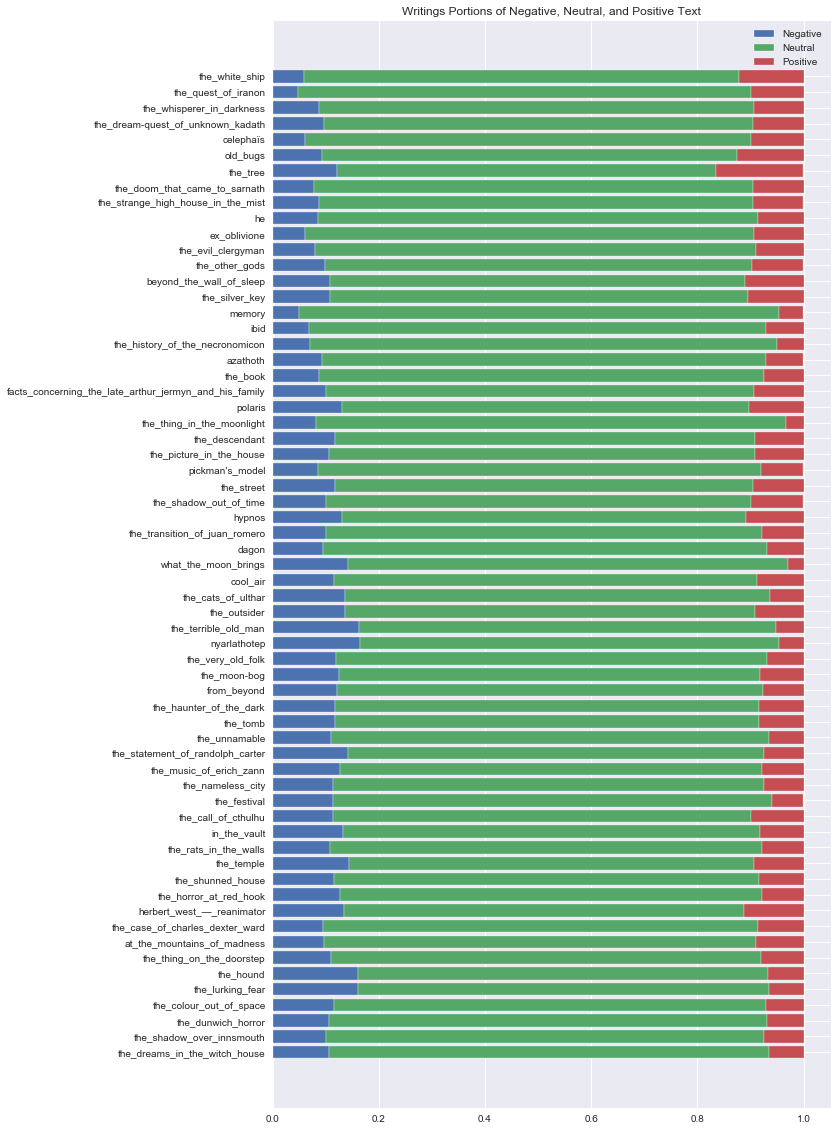

In [99]:
plt.figure(figsize = (10,20))
plt.barh(width = neg_portion, y = titles, label = 'Negative')
plt.barh(width = neu_portion, y = titles, label = 'Neutral', left = neg_portion)
plt.barh(width = pos_portion, y = titles, label = 'Positive', left = neg_plus_neu_portion)
plt.title('Writings Portions of Negative, Neutral, and Positive Text')
plt.legend()
plt.show()

# TF - IDF